# **BT thực hành 7.4: ANOVA**


> Cập nhật: **07/2023**



In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/Data Mining/Thống kê suy diễn'

Mounted at /content/gdrive


In [2]:
## Thư viện
import matplotlib.pyplot         as plt
import numpy                     as np
import pandas                    as pd
import scipy.stats               as stats
import seaborn                   as sbn
import statsmodels.api           as sm

from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

---
## **Yêu cầu 1: One-way ANOVA**

**Yêu cầu:**
* Các quan sát độc lập
* Các quần thể có phương sai giống nhau
  * Kiểm định xem phương sai có giống nhau không? ⇒ **KIỂM ĐỊNH LEVENE**
* Các quần thể có phân phối chuẩn ⇒ Nếu không có thì *chọn mẫu lớn*

**Các giả thuyết kiểm định**
*    ***H0: Muy[i] = Muy[j], với mọi i, j***
*    ***Ha: Có sự khác biệt giữa các Muy[i]***

**Tra bảng:**
*   df của W ⇒ Row
*   df của B ⇒ Column

**Objective**
* Nếu mục tiêu chỉ cần xác định xem là trung bình các quần thể có bằng nhau không? (có độc lập hay không) -> that's all
  * ANOVA không xác định rõ được những Muy nào có sự khác biệt
* Nếu cần biết Muy nào khác Muy nào -> Hậu kiểm ANOVA (Kiểm định Tukey HSD)



---


1. Đọc tập tin dữ liệu '**Excavation Depth and Archaeology.txt**'.
2. Phân tích ANOVA theo các giá trị SSW, SSB.
3. Phân tích ANOVA dựa trên hàm của Python.

---

In [3]:
##------------------------------------------------------------------------------
## Đọc tập tin dữ liệu
##------------------------------------------------------------------------------
## Kích thước của các mẫu có thể KHÁC NHAU
data = pd.read_csv(folder + "/Excavation Depth and Archaeology.txt", sep = '\t')

In [4]:
##------------------------------------------------------------------------------
## Chuẩn bị dữ liệu
##------------------------------------------------------------------------------
## Xác định k nhóm là k cột trong tập dữ liệu
# groupsA = list(d.columns.values) # array
k      = len(data.columns)
groups = list(data.columns) # (k column headers)

## Tạo k mẫu (loại bỏ giá trị NaN trong các mẫu)
samples = []
for j in range(k):
    sample = [x for x in data[groups[j]] if pd.notnull(x)]
    samples.append(sample)

In [5]:
##---------------------------------------------
## Các giả thuyết kiểm định
##    H0: Muy[i] = Muy[j], với mọi i, j
##    Ha: Có sự khác biệt giữa các Muy[i]
##---------------------------------------------

In [6]:
##------------------------------------------------------------------------------
## 1. Phân tích ANOVA theo các giá trị SSW, SSB.
##------------------------------------------------------------------------------
## Số phần tử của mỗi nhóm
sizes = np.zeros(k)
for j in range(k):
    sizes[j] = np.size(samples[j])

## Giá trị trung bình của mỗi mẫu
means = np.zeros(k)
for j in range(k):
    means[j] = np.mean(samples[j])

## Giá trị trung bình của tất cả các mẫu
meanT = np.mean(means)

## Các đại lượng BETWEEN groups: SSB, dfB
SSB = 0
for j in range(k):
    SSB += sizes[j] * np.power((means[j] - meanT), 2)
dfB = (k - 1)
print(f'* BETWEEN group: SSB = {SSB:.4f}, dfB = {dfB}')

## Các đại lượng WITHIN groups: SSW, dfW
SSW = 0
for j in range(k):
    SSWj = 0
    for i in range(int(sizes[j])):
        SSWj += np.power(samples[j][i] - means[j], 2)
    SSW += SSWj
dfW = int(np.sum(sizes) - k)
print(f'* WITHIN  group: SSW = {SSW:.4f}, dfW = {dfB}')

## Trị thống kê: F statistics
F = (SSB / dfB) / (SSW / dfW)

* BETWEEN group: SSB = 12486.4848, dfB = 3
* WITHIN  group: SSW = 11464.5722, dfW = 3


In [7]:
##------------------------------------------------------------------------------
## Kết luận theo phương pháp giá trị tới hạn
##------------------------------------------------------------------------------
## Hàm scipy.stats.f.ppf(q, dfn, dfd) xác định giá trị tới hạn
##    q  : confidence level     (1 - alpha)
##    dfn: tử số (numerator)    dfB (BETWEEN groups)
##    dfd: mẫu số (denominator) dfW (WITHIN groups)
##
## Hàm scipy.stats.f.cdf(crit, dfn, dfd) xác định confidence level (1 - alpha)
##------------------------------------------------------------------------------
alpha = 0.05
cv    = stats.f.ppf(q = 1 - alpha, dfn = dfB, dfd = dfW)

if (F > cv):
    print(f'Trị thống kê z = {F:.4f} > {cv:.4f} cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD')
else:
    print('KHÔNG bác bỏ H0')

Trị thống kê z = 15.2479 > 2.8270 cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD


***Hàm stats.f_oneway***

In [8]:
##------------------------------------------------------------------------------
## 2. Phân tích ANOVA dựa trên hàm của Python
##------------------------------------------------------------------------------
f, p = stats.f_oneway(samples[0], samples[1], samples[2], samples[3])

## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} cho nên Mean[i] = Mean[j], với mọi i, j')

Trị số p = 0.0000 < 0.0500 cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD


---
## **Yêu cầu 2: One-way ANOVA**
> Phân tích ANOVA trên tập tin dữ liệu '**lam_them.txt**' với alpha = 0.05.


---

In [10]:
##------------------------------------------------------------------------------
## Đọc tập tin dữ liệu
##------------------------------------------------------------------------------

##Phân tích xem điểm trung bình của môn học và số giờ làm thêm một tuần có liên quan hay không?
data = pd.read_csv(folder + "/lam_them.txt", sep = '\t')
data.head()

,Less_6hrs,From_6_12_hrs,More_12hrs
0,6.3,7.2,6.3
1,7.0,6.6,5.8
2,6.5,6.1,6.0
3,6.6,5.8,5.5
4,7.2,6.8,5.2


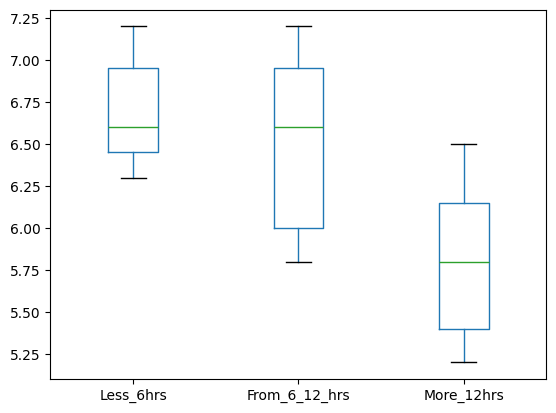

In [11]:
## Biểu diễn trực quan bằng Boxplot --> quan sát sự khác biệt giữa các nhóm
data.boxplot(grid = False)
plt.show()

In [12]:
##------------------------------------------------------------------------------
## Phân tích ANOVA dựa trên hàm của Python
##------------------------------------------------------------------------------
f, p = stats.f_oneway(data['Less_6hrs'], data['From_6_12_hrs'], data['More_12hrs'])

## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} cho nên Mean[i] = Mean[j], với mọi i, j')

Trị số p = 0.0062 < 0.0500 cho nên bác bỏ H0 ==> hậu kiểm Tukey HSD


##**Hậu kiểm Tukey HSD**
1.   Melt dữ liệu ⇒ đưa dữ liệu về dạng **feature values**
2.   Dùng hàm **pairwise_tukeyhsd**
3.    Dòng cuối: True → Cặp đó khác; False → Cặp đó giống



In [13]:
## Quy định của statsmodels: tên cột là feature, không phải là giá trị
## Chuyển bảng dữ liệu về dạng CSDL: (features-values) --> dùng cho hậu kiểm
df_melt = pd.melt(data.reset_index(),
                  id_vars = ['index'],
                  value_vars = ['Less_6hrs', 'From_6_12_hrs', 'More_12hrs'])

df_melt.columns = ['index', 'working_type', 'value']  # đặt tên các cột
df_melt

,index,working_type,value
0,0,Less_6hrs,6.3
1,1,Less_6hrs,7.0
2,2,Less_6hrs,6.5
3,3,Less_6hrs,6.6
4,4,Less_6hrs,7.2
5,5,Less_6hrs,6.9
6,6,Less_6hrs,6.4
7,0,From_6_12_hrs,7.2
8,1,From_6_12_hrs,6.6
9,2,From_6_12_hrs,6.1


***Hàm stats.anova_lm ⇒ Output: ANOVA TABLE***

In [ ]:
## Hàm anova_lm() tạo ANOVA table
model       = ols('value ~ C(working_type)', data = df_melt).fit()
anova_table = sm.stats.anova_lm(model)
# cột cuối cùng = trị số p

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(working_type),2.0,3.126667,1.563333,6.830097,0.006206
Residual,18.0,4.120000,0.228889,NaN,NaN


In [ ]:
## Hậu kiểm Tukey HSD
m_comp = pairwise_tukeyhsd(endog  = df_melt['value'],
                           groups = df_melt['working_type'],
                           alpha  = 0.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1      group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
From_6_12_hrs  Less_6hrs      0.2 0.7185 -0.4527  0.8527  False
From_6_12_hrs More_12hrs     -0.7 0.0345 -1.3527 -0.0473   True
    Less_6hrs More_12hrs     -0.9 0.0066 -1.5527 -0.2473   True
---------------------------------------------------------------


## Nhận xét:
*Ngoại trừ cặp (From_6_12_hrs, Less_6hrs) có reject = False, tất cả so sánh những cặp khác đều bác bỏ H0 (reject = True), nghĩa là có sự khác biệt đáng kể về mặt thống kê.*

---
## **Yêu cầu 3: So sánh mức độ an toàn giữa các loại xe bằng One-way ANOVA**
> Bảng bên dưới thể hiện những lần thu thập số liệu về tai nạn của 3 loại xe. Hãy kiểm định giả thuyết về sự độc lập giữa mức độ an toàn và các loại xe, với α = 5%.

Phân tích khả năng gây tai nạn độc lập hay phụ thuộc vào kích thước xe → Kích thước xe có ảnh hưởng đến khả năng gây tai nạn hay không?

|---|S_cars|M_cars|X_cars |
|---|---|---|---|
|0|643|469|484|
|1|655|427|456|
|2|702|525|402|

1. Tạo dataframe chứa các mẫu dữ liệu.
2. Vẽ boxplot, quan sát kết quả.
3. Phân tích ANOVA với alpha = 5%.
---

In [ ]:
## 1. Tạo dataframe chứa các mẫu dữ liệu.
df = pd.DataFrame({"S_cars": [643,655,702],
                   "M_cars": [469, 427, 525],
                   "X_cars": [484, 456, 402]
})

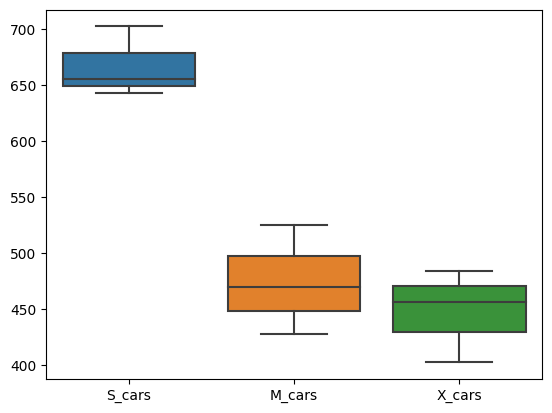

In [ ]:
## 2. Vẽ boxplot, quan sát kết quả.
sbn.boxplot(data = df)
plt.show()

In [ ]:
##------------------------------------------------------------------------------
## 3. Phân tích ANOVA với alpha = 5%.
##------------------------------------------------------------------------------
alpha = .05

### **KIỂM ĐỊNH LEVENE ⇒ Giống phương sai hay không?**

In [ ]:
## 3a) Kiểm định điều kiện S_cars, M_cars, X_cars có cùng phương sai (Levene)
##-------------------------------------------------
## Các giả thuyết kiểm định LEVENE:
##     H0: VAR(S_cars) = VAR(M_cars) = VAR(X_cars)
##     Ha: Các phương sai KHÔNG BẰNG NHAU
##-------------------------------------------------
levene, p = stats.levene(df.S_cars, df.M_cars, df.X_cars)
print(f'Trị thống kê Levene = {levene:4f}; p = {p:4f}')
## p > alpha cho nên KHÔNG bác bỏ H0: VAR(S_cars) = VAR(M_cars) = VAR(X_cars)

Trị thống kê Levene = 0.176705 > p = 0.842235


#### ***Không thỏa ⇒ Dùng Kiểm định Welch***

### **KIỂM ĐỊNH SHAPIRO ⇒ Có phân phối chuẩn hay không?**
Yêu cầu: Dữ liệu **feature values**

In [ ]:
## 3b) Kiểm định điều kiện phân phối chuẩn (Shapiro)
##---------------------------------------------------
## Các giả thuyết kiểm định SHAPIRO:
##     H0: S_cars, M_cars, X_cars ~ Norm(Mu, Sigma)
##     Ha: S_cars, M_cars, X_cars KHÔNG phải pp chuẩn
##---------------------------------------------------
df_melt = pd.melt(df.reset_index(),
                  id_vars = ['index'],
                  value_vars = ['S_cars', 'M_cars', 'X_cars'])
print(df)
print(df_melt)

   S_cars  M_cars  X_cars
0     643     469     484
1     655     427     456
2     702     525     402
   index variable  value
0      0   S_cars    643
1      1   S_cars    655
2      2   S_cars    702
3      0   M_cars    469
4      1   M_cars    427
5      2   M_cars    525
6      0   X_cars    484
7      1   X_cars    456
8      2   X_cars    402


In [ ]:
## Kiểm định Shapiro dựa trên Ordinary Least Squares (OLS) model
df_melt.columns = ['index', 'cars', 'value']  # tên các cột
model           = ols('value ~ C(cars)', data = df_melt).fit()
shapiro, p      = stats.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f}; p = {p:4f}')
## p > alpha cho nên KHÔNG bác bỏ H0: S_cars, M_cars, X_cars ~ Norm(Mu, Sigma)

Trị thống kê Shapiro = 0.934810 > p = 0.528445


#### ***Không thỏa ⇒ Dùng kiểm định Kruskal-Wallis H***

In [ ]:
## 3c) Áp dụng One-way ANOVA
##     Hàm f_oneway() chỉ trả về F-statistic và p-value, KHÔNG tạo ANOVA table
f, p = stats.f_oneway(df.S_cars, df.M_cars, df.X_cars)

if (p < alpha):
    print(f'* Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0 ==> có sự khác biệt giữa các loại xe')
else:
    print(f'* Trị số p = {p:.4f} >= {alpha:.4f} cho nên KHÔNG bác bỏ H0 ==> KHÔNG có sự khác biệt giữa các loại xe')
## p-value có ý nghĩa về mặt thống kê (p < 0.05)

## Hàm anova_lm() tạo ANOVA table
anova_table = sm.stats.anova_lm(model, typ = 2)
print('\n* ANOVA table\n', anova_table)

anova_table = sm.stats.anova_lm(model, typ = 1) # có thêm cột mean_squared
print('\n* ANOVA table\n', anova_table)

* Trị số p = 0.0012 < 0.0500 cho nên bác bỏ H0 ==> có sự khác biệt giữa các loại xe

* ANOVA table
                 sum_sq   df          F    PR(>F)
C(cars)   86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN

* ANOVA table
            df        sum_sq       mean_sq          F    PR(>F)
C(cars)   2.0  86049.555556  43024.777778  25.175411  0.001207
Residual  6.0  10254.000000   1709.000000        NaN       NaN


In [ ]:
## 3d) Hậu kiểm Tukey HSD
m_comp = pairwise_tukeyhsd(endog  = df_melt['value'],
                           groups = df_melt['cars'],
                           alpha  = 0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
M_cars S_cars     193.0  0.003   89.4334  296.5666   True
M_cars X_cars  -26.3333 0.7279 -129.8999   77.2332  False
S_cars X_cars -219.3333 0.0015 -322.8999 -115.7668   True
---------------------------------------------------------


## Nhận xét:
*Ngoại trừ cặp (M_cars, X_cars) có reject = False, tất cả so sánh những cặp khác đều bác bỏ H0 (reject = True), nghĩa là có sự khác biệt đáng kể về mặt thống kê.*

---
## **Yêu cầu 4: Two-way ANOVA**
***Kiểm định hai biến độc lập***


---


> Tập tin '**data.xlsx**' lưu trữ dữ liệu về chất lượng loại bỏ chất bẩn của các loại chất tẩy rửa (super, best) theo nhiệt độ (hot, warm, cold). Với α = 5%, hãy kiểm định các giả thuyết:
*   H0-D: Lượng chất bẩn bị loại bỏ không phụ thuộc vào loại chất tẩy rửa.
*   H0-T: Lượng chất bẩn bị loại bỏ không phụ thuộc vào nhiệt độ.

Kiểm định xem chất lượng tẩy rửa có phụ thuộc vào nhiệt độ không?


##### Tham khảo http://statweb.stanford.edu/~susan/courses/s141/exanova.pdf
---

In [14]:
## Đọc tập tin dữ liệu
data = pd.read_excel(folder + "/data.xlsx")
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/Data Mining/Thống kê suy diễn/data.xlsx'

In [ ]:
alpha = .05

## Kiểm định điều kiện có cùng phương sai
##-------------------------------------------------
## Các giả thuyết kiểm định LEVENE:
##     H0: Các mẫu dữ liệu có phương sai BẰNG NHAU
##     Ha: Các mẫu dữ liệu có phương sai KHÁC NHAU
##-------------------------------------------------
levene, p = stats.levene(data['hot'], data['warm'], data['cold'])
print(f'Trị thống kê Levene = {levene:4f} > p = {p:4f}')
## p > alpha cho nên KHÔNG bác bỏ H0

Trị thống kê Levene = 2.015152 > p = 0.158274


In [ ]:
## Quy định của statsmodels: tên cột là feature, không phải là giá trị
## Chuyển bảng dữ liệu về dạng CSDL: (features-values)
d_melt         = pd.melt(data, id_vars = ['type'], value_vars = ['cold', 'warm', 'hot'])
d_melt.columns = ['type', 'temperature', 'value'] # tên các cột
d_melt.head()

,type,temperature,value
0,super,cold,4
1,super,cold,5
2,super,cold,6
3,super,cold,5
4,best,cold,6


In [ ]:
## Kiểm định Shapiro dựa trên Ordinary Least Squares (OLS) model
d_melt         = pd.melt(data, id_vars=['type'], value_vars = ['cold', 'warm', 'hot'])
d_melt.columns = ['type', 'temperature', 'value'] # tên các cột
model          = ols('value ~ C(type) + C(temperature) + C(type):C(temperature)', data = d_melt).fit()

shapiro, p = stats.shapiro(model.resid)
print(f'Trị thống kê Shapiro = {shapiro:4f} > p = {p:4f}')
## p > alpha cho nên KHÔNG bác bỏ H0:

Trị thống kê Shapiro = 0.952557 > p = 0.307516


In [ ]:
## Áp dụng Two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ = 2)
print('* ANOVA table\n', anova_table)
## Sự khác biệt về chất tẩy rửa và nhiệt độ có ý nghĩa về mặt thống kê.

* ANOVA table
                             sum_sq    df          F        PR(>F)
C(type)                  20.166667   1.0   9.810811  5.758440e-03
C(temperature)          200.333333   2.0  48.729730  5.439849e-08
C(type):C(temperature)   16.333333   2.0   3.972973  3.722434e-02
Residual                 37.000000  18.0        NaN           NaN


**Để nhận biết những cặp (chất tẩy rửa, nhiệt độ) nào khác nhau đáng kể, cần thực hiện nhiều so sánh từng cặp bằng Tukey HSD test.**

In [ ]:
## Để nhận biết những cặp (chất tẩy rửa, nhiệt độ) nào khác nhau đáng kể,
## cần thực hiện nhiều so sánh từng cặp bằng Tukey HSD test.
## Kiểm định Tukey HSD
m_comp = pairwise_tukeyhsd(endog = d_melt['value'], groups = d_melt['type'], alpha = 0.05)

*Phân tích theo loại chất tẩy rửa*

In [ ]:
print(m_comp)

## Phân tích theo type = {best, super}
for name, grouped_df in d_melt.groupby('type'):
    print('\ntype: {}'.format(name))
    print(pairwise_tukeyhsd(grouped_df['value'],
                            grouped_df['temperature'],
                            alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  best  super  -1.8333 0.1996 -4.7083 1.0416  False
---------------------------------------------------

type: best
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  cold    hot      7.0 0.0001  4.3677  9.6323   True
  cold   warm      8.0    0.0  5.3677 10.6323   True
   hot   warm      1.0 0.5601 -1.6323  3.6323  False
----------------------------------------------------

type: super
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  cold    hot      5.5 0.0017  2.4843 8.5157   True
  cold   warm      4.0 0.0122  0.9843 7.0157   True
   hot   warm     -1.5 0.3863 -4.5157 1.5157  False
--------------------------------

*Phân tích theo nhiệt độ*

In [ ]:
## Phân tích theo temperature = {cold, hot, warm}
for name, grouped_df in d_melt.groupby('temperature'):
   print('\ntemperature: {}'.format(name))
   print(pairwise_tukeyhsd(grouped_df['value'],
                           grouped_df['type'],
                           alpha = 0.05))


temperature: cold
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  best  super      0.0   1.0 -1.7302 1.7302  False
--------------------------------------------------

temperature: hot
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  best  super     -1.5 0.1682 -3.8427 0.8427  False
---------------------------------------------------

temperature: warm
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  best  super     -4.0 0.0212 -7.1589 -0.8411   True
----------------------------------------------------
